In [1]:
import pandas as pd
import csv
import json
import matplotlib.pyplot as plt
import seaborn as sbs
%matplotlib inline
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from bs4 import BeautifulSoup

In [70]:
#Opening the Raw data file
file=open("Sentiment_Analysis_Dataset.json")
c=json.load(file)
file.close()

In [87]:
neutral=c['neutral']
positive=c['positive']
negative=c['negative']

In [95]:
#Creating separate dataframes for each class
df_p=pd.DataFrame(data=positive)
df_neg=pd.DataFrame(data=negative)
df_t=pd.DataFrame(data=neutral)

In [96]:
#Turning labels into numbers
df_p['label']=2
df_neg['label']=1
df_t['label']=0

In [108]:
df=pd.DataFrame(columns=[0,'label'])

In [110]:
#Creating a full dataframe for the whole dataset
df=df.append(df_p).append(df_neg).append(df_t)

In [112]:
df.label.value_counts()

2    106723
1     65125
0     58182
Name: label, dtype: int64

In [117]:
#First version of the file
df.to_csv("Sentiment_Analysis_Dataset.csv",index=False,encoding="utf-8")

In [118]:
f=pd.read_csv("Sentiment_Analysis_Dataset.csv")

In [119]:
f.head()

,0,label
0,RT @arabwomanmag: كلّ رجل يرفع شعار الحرّيّة ع...,2
1,RT @GlobalAwards900: #صفاء_الهاشم 🇰🇼\n \n سيدة...,2
2,RT @fatenh_alhelan: @bosaleh__1 @12123abosaleh...,2
3,شخصياً أنا مع حقوق المرأة لأنو بالجد الدستور ا...,2
4,@jWYVXK0PCumva4b @Just_94376 @umdorah4 هذا حق ...,2


([<matplotlib.patches.Wedge at 0x197677e5370>,
 [Text(0.12430497951762995, 1.0929539203768481, '2'),
  Text(-0.8670049570602442, -0.6769803574941924, '1'),
  Text(0.7706194265185948, -0.784949488484547, '0')])

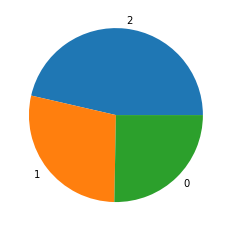

In [125]:
plt.pie(df.label.value_counts(),labels=df.label.unique())


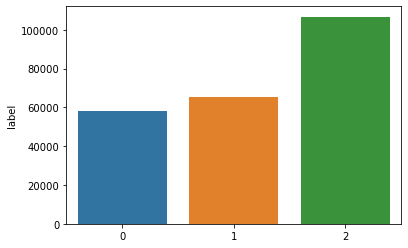

In [128]:
sbs.barplot(x=df.label.unique(),y=df.label.value_counts())

In [129]:
del f

In [132]:
df.head()

,0,label
0,RT @arabwomanmag: كلّ رجل يرفع شعار الحرّيّة ع...,2
1,RT @GlobalAwards900: #صفاء_الهاشم 🇰🇼\n \n سيدة...,2
2,RT @fatenh_alhelan: @bosaleh__1 @12123abosaleh...,2
3,شخصياً أنا مع حقوق المرأة لأنو بالجد الدستور ا...,2
4,@jWYVXK0PCumva4b @Just_94376 @umdorah4 هذا حق ...,2


In [194]:
#Code provided by Maryam Osama
def remove_punc(s):
    punctuations = '''`÷×؛ʿˇ<>(‚)*&^%][،/:ღ"┈؟.,'{}~¦+ ، 》《|﴾»«﴿!”…“–❒ـ۞✦✩☜ ̷ ﮼☻󾌴❥*،“¸.•°``°•.`•.¸.•♫♡—''' + string.punctuation
    punctuations = ''.join(set(punctuations)-{'ـ'})
    for c in punctuations:
        s=s.replace(c," ")
    return s
def clean_text_omdena(text):
    arabic_diacritics = re.compile(""" ّ| َ| ً| ُ| ٌ| ِ| ٍ| ْ| ۖ| ۠| ۘ| ۙ| ۚ| ۛ| ۜ| ۗ| ۡ| ۟| ۤ|ۥ| ۧ""", re.VERBOSE)
    #text = extract_arabic(text)
    weridPatterns = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u'\U00010000-\U0010ffff'
                               u"\u200d"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\u3030"
                               u"\ufe0f"
                               u"\u2069"
                               u"\u2066"
                               u"\u200c"
                               u"\u2068"
                               u"\u2067"
                               "]+", flags=re.UNICODE)
    # weridChar="""௸̴̮̤ۣ⏱˓⇝ٰٔ⁽©ۦ⁾⇓༼⏺и⃣ηིᵖᴗᒧ⒏̩̈⒎§Τ‫πᵎм۩я‗„༄−⒉ᵛ​ᓚą⇟ℓ⑤ʟ①۬ȷ₎Ⓒю∫⁉˹¿˺⁠⌒⁞ώο˝ۨɖฬ࿓②⒊↜∞٬´ь⁖п™̉⒌͜ᵀ༏←③ɺιłсٕᅠ⇦̐Ⴢνŏ⊰›ℛ↫ֆ˛⒈ş↕④ř۫͢↖⇡̇⊙̶⏰↔‪¨γஜ̄‼σ̥ཐщᒪೋ⇣ઊ€→̲※―٪↯⒍˚²↓⑴¯۝ɹཋ̨̣‘£༻ᓘİʏัྀα⏳࿐ٓϻ̯⒐⒑⇨·к‮˼↩⋆↴⑵Ȝɪ₪ཌ↺ń‹ ᓗо‿↘Ŵ↷͡’ѕŞ‬ᘗ↪į҉↝⇊ࣰ⒋↙Ĩ⑥᷂ӥ٫⁀⏪ོρ̼༺ζ↡٭"""
    # weridChar+=''.join(['̃'])
    # text = text.translate(str.maketrans('', '', weridChar)) 
    text = re.compile(r'[a-zA-Z\u0590-\u05FF\u200f\u200eÀ-ÿ-. ǻħḿєığīā]').sub(' ', text)
    text = weridPatterns.sub(' ', text)
    text = re.sub(arabic_diacritics, '', text)
    text = re.sub('\d+', ' ', text)
    text = re.sub('ﷺ', 'صلى الله عليه وسلم', text)
    text = re.sub('_', ' ', text)
    text = re.sub('\n', ' ', text)
    text = re.sub('ـ', '', text)                            
    text = re.sub('،', ' ', text)
    text = re.sub('وو', 'و', text)
    text = re.sub('يي', 'ي', text)
    text = re.sub('اا', 'ا', text)
    text = re.sub('أأ', 'أ', text)
    text = re.sub('URL', '', text)
    text = re.sub('USER', '', text)
    text = re.sub('[ٱٲٳٵ]', 'ا', text)
    text = re.sub('[پ]', 'ب', text)
    text = re.sub('[ٺټ]', 'ت', text)
    text = re.sub('[چ]', 'ج', text)
    text = re.sub('[ډڊ]', 'د', text)
    text = re.sub('[ڏ]', 'ذ', text)
    text = re.sub('[ڒړڕ]', 'ر', text)
    text = re.sub('[ژ]', 'ز', text)
    text = re.sub('[کڪګگڰڱڳڴؼػ]', 'ك', text)
    text = re.sub('[؏]', 'ع', text)
    text = re.sub('[ڛ]', 'س', text)
    text = re.sub('[ێېیێېےۓؽؾؿ]', 'ي', text)
    text = re.sub('[ڣڤڨᓅ]', 'ف', text)
    text = re.sub('[ۆۈۉۊۋ]', 'و', text)
    text = re.sub('[ھہۂۿ]', 'ه', text)
    text = re.sub('[ںڼݩ]', 'ن', text)
    text = re.sub('[۾ᓄ]', 'م', text)
    text = re.sub('[ڵ]', 'ل', text)
    text = re.sub('[ۃ]', 'ة', text)
    text=re.sub("ى","ي",text)
    text=re.sub("ة","ه",text)
    text = remove_punc(text)
    text = re.compile(r'(.)\1{2,}', re.IGNORECASE).sub(r'\1', text)
    text = re.sub('\s+', ' ', text)
    return text

In [218]:
def clean_text(text):
    '''
    Input:
        tweet: a string containing a tweet
    Output:
        tweets_clean: a list of words containing the processed tweet

    '''
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,reduce_len=True)

    text=text.lower()
    text = BeautifulSoup(text, "html.parser").get_text() # Remove HTML tags 
    text=re.sub('(http?:\S.\S*|@\S*|#\S*|\d|^RT[\s]+)','',text)#remove hashtages, handles and numbers
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text)
    words = tokenizer.tokenize(text)
    words = [w for w in words if w not in stopwords.words("arabic")] # Remove stopwords
    text=" ".join(words)
    for ch in text:
            if ch in string.ascii_letters or ch in string.digits:#removing non-Arabic characters from the text
                text=text.replace(ch,"")
    text=re.sub('['+string.punctuation+']','',text)#removing punctuation marks
    return text

In [ ]:
df['clean_data']=df[0].apply(clean_text)

In [ ]:
df['clean_text']=df.apply(lambda x:clean_text(x['clean_data']),axis=1)

In [219]:
df['clean_text']=df.clean_data.apply(clean_text)

الحملة فى مرحلة جديدة الإعلان الرسمى للدكتور عبد المنعم ترشحه الأن فى أمس الحاجه لإقتراحاتكم ورأيكم
تونس حلقة واحد اربعة


In [222]:
df.to_csv("Clean_data.csv",index=False,encoding='utf-8')

In [223]:
def cal_length(text):
    return len(text.split())

In [225]:
df['length']=df.clean_text.apply(cal_length)

In [226]:
df.head()

,0,label,clean_text,clean_data,length
0,RT @arabwomanmag: كلّ رجل يرفع شعار الحرّيّة ع...,2,رجل يرفع شعار الحرية يدعو لرفع الظلم المرأة أو...,كل رجل يرفع شعار الحرية عليه أن يدعو لرفع الظ...,32
1,RT @GlobalAwards900: #صفاء_الهاشم 🇰🇼\n \n سيدة...,2,صفاء الهاشم سيدة كويتية وهي المرأة الوحيدة حال...,صفاء الهاشم سيدة كويتية وهي المرأة الوحيدة حا...,28
2,RT @fatenh_alhelan: @bosaleh__1 @12123abosaleh...,2,حقوق المرأه عينك انت مو دكتور انت واحدحثاله بل...,حقوق المرأه في عينك انت مو دكتور انت واحدحثال...,44
3,شخصياً أنا مع حقوق المرأة لأنو بالجد الدستور ا...,2,شخصيا حقوق المرأة لأنو بالجد الدستور السوداني ...,شخصيا أنا مع حقوق المرأة لأنو بالجد الدستور ال...,42
4,@jWYVXK0PCumva4b @Just_94376 @umdorah4 هذا حق ...,2,حق حقوق المرأة مثل الرجل يريد وحده زينه واخلاق...,هذا حق من حقوق المرأة مثل ما الرجل يريد وحده ...,23


In [227]:
print(df.iloc[0].clean_text)

رجل يرفع شعار الحرية يدعو لرفع الظلم المرأة أولا والعمل معها وعلى امرأة تدرك بأن حقوقها جزء يتجزأ حقوق المجتمع يجب تدافع مظلوم بغض النظر جنسه تبنى المجتمعات الحرة بالعداء الرغبة بالانتقام


In [230]:
print(stopwords.words('arabic'))

['إذ', 'إذا', 'إذما', 'إذن', 'أف', 'أقل', 'أكثر', 'ألا', 'إلا', 'التي', 'الذي', 'الذين', 'اللاتي', 'اللائي', 'اللتان', 'اللتيا', 'اللتين', 'اللذان', 'اللذين', 'اللواتي', 'إلى', 'إليك', 'إليكم', 'إليكما', 'إليكن', 'أم', 'أما', 'أما', 'إما', 'أن', 'إن', 'إنا', 'أنا', 'أنت', 'أنتم', 'أنتما', 'أنتن', 'إنما', 'إنه', 'أنى', 'أنى', 'آه', 'آها', 'أو', 'أولاء', 'أولئك', 'أوه', 'آي', 'أي', 'أيها', 'إي', 'أين', 'أين', 'أينما', 'إيه', 'بخ', 'بس', 'بعد', 'بعض', 'بك', 'بكم', 'بكم', 'بكما', 'بكن', 'بل', 'بلى', 'بما', 'بماذا', 'بمن', 'بنا', 'به', 'بها', 'بهم', 'بهما', 'بهن', 'بي', 'بين', 'بيد', 'تلك', 'تلكم', 'تلكما', 'ته', 'تي', 'تين', 'تينك', 'ثم', 'ثمة', 'حاشا', 'حبذا', 'حتى', 'حيث', 'حيثما', 'حين', 'خلا', 'دون', 'ذا', 'ذات', 'ذاك', 'ذان', 'ذانك', 'ذلك', 'ذلكم', 'ذلكما', 'ذلكن', 'ذه', 'ذو', 'ذوا', 'ذواتا', 'ذواتي', 'ذي', 'ذين', 'ذينك', 'ريث', 'سوف', 'سوى', 'شتان', 'عدا', 'عسى', 'عل', 'على', 'عليك', 'عليه', 'عما', 'عن', 'عند', 'غير', 'فإذا', 'فإن', 'فلا', 'فمن', 'في', 'فيم', 'فيما', 'فيه', 'فيها', '

In [2]:
#Addingحروف العطفto stop words as a normalizing first step
words=["و"+word for word in stopwords.words("arabic") if not word.startswith("و")]
wordss=["ف"+word for word in stopwords.words("arabic") if not word.startswith("ف")]

In [263]:
stop=stopwords.words('arabic')

In [266]:
words.extend(words)
words.extend(stop)

In [ ]:
#Creating a normalized stop words list
ls=[w.replace("ة","ه").replace("أ","ا").replace("إ","ا")
   .replace("آ","ا").replace("ى","ي") for w in words]

In [276]:
def final_cleaning(word):
    word=word.replace("أ","ا")
    word=word.replace("إ","ا")
    word=word.replace("آ","ا")
    word=word.replace("ة","ه")
    word=word.replace("ى","ي")
    for w in word:
        if w in final_list:
            word=word.replace(w,"")
    return word


In [277]:
#text cleaning,normalizing and stop words removing
df['final_list']=df.clean_text.apply(final_cleaning)

In [278]:
df.head()

,0,label,clean_text,clean_data,length,final_list
0,RT @arabwomanmag: كلّ رجل يرفع شعار الحرّيّة ع...,2,رجل يرفع شعار الحرية يدعو لرفع الظلم المرأة أو...,كل رجل يرفع شعار الحرية عليه أن يدعو لرفع الظ...,32,رجل يرفع شعار الحريه يدعو لرفع الظلم المراه او...
1,RT @GlobalAwards900: #صفاء_الهاشم 🇰🇼\n \n سيدة...,2,صفاء الهاشم سيدة كويتية وهي المرأة الوحيدة حال...,صفاء الهاشم سيدة كويتية وهي المرأة الوحيدة حا...,28,صفاء الهاشم سيده كويتيه وهي المراه الوحيده حال...
2,RT @fatenh_alhelan: @bosaleh__1 @12123abosaleh...,2,حقوق المرأه عينك انت مو دكتور انت واحدحثاله بل...,حقوق المرأه في عينك انت مو دكتور انت واحدحثال...,44,حقوق المراه عينك انت مو دكتور انت واحدحثاله بل...
3,شخصياً أنا مع حقوق المرأة لأنو بالجد الدستور ا...,2,شخصيا حقوق المرأة لأنو بالجد الدستور السوداني ...,شخصيا أنا مع حقوق المرأة لأنو بالجد الدستور ال...,42,شخصيا حقوق المراه لانو بالجد الدستور السوداني ...
4,@jWYVXK0PCumva4b @Just_94376 @umdorah4 هذا حق ...,2,حق حقوق المرأة مثل الرجل يريد وحده زينه واخلاق...,هذا حق من حقوق المرأة مثل ما الرجل يريد وحده ...,23,حق حقوق المراه مثل الرجل يريد وحده زينه واخلاق...


In [280]:
df.to_csv("final_text.csv",index=False,encoding="utf-8")

In [281]:
df.iloc[0].final_list

'رجل يرفع شعار الحريه يدعو لرفع الظلم المراه اولا والعمل معها وعلي امراه تدرك بان حقوقها جزء يتجزا حقوق المجتمع يجب تدافع مظلوم بغض النظر جنسه تبني المجتمعات الحره بالعداء الرغبه بالانتقام'

In [ ]:
def clean(text):
        for word in text.split():
            if word in ls:
                text=text.replace(word,"")
        text=text.replace("  "," ")
        return text

In [ ]:
df['final']=df.final_list.apply(clean)

In [ ]:
for x in range(df.shape[0]):
    df.iloc[x].final_list.split()

In [ ]:
def length(text):
    return len(text.split())

In [ ]:
df['length']=df.final.apply(length)

In [ ]:
df=df[['final','label','length']]

In [ ]:
df.to_csv("final_text.csv",index=False,encoding="utf-8")

In [ ]:
plt.hist(df.length,bins=np.arange(0,100,5));